In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loding data

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


# Data understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [5]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Data Exploratory Analysis

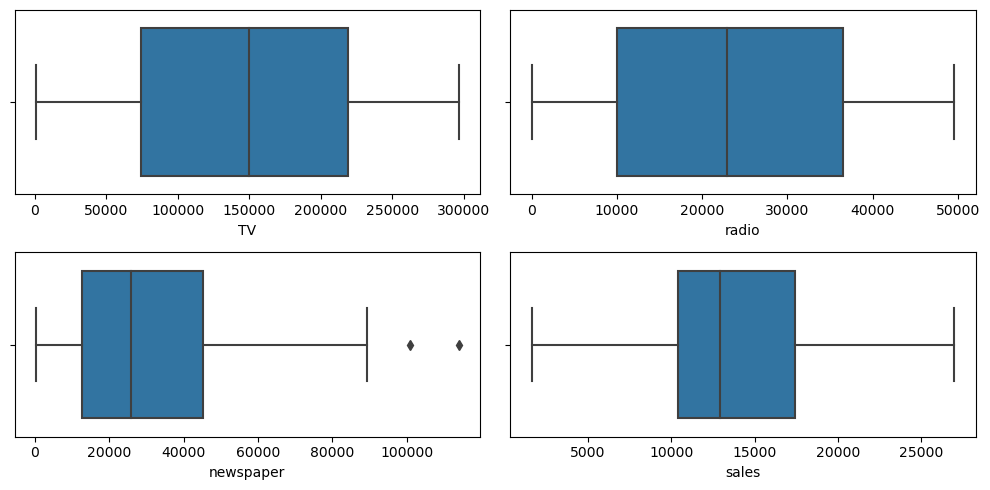

In [6]:
plt.figure(figsize = (10,5))

i = 1
for cols in df.columns:
    plt.subplot(2,2,i);i += 1
    sns.boxplot(x = df[cols])
    plt.tight_layout()

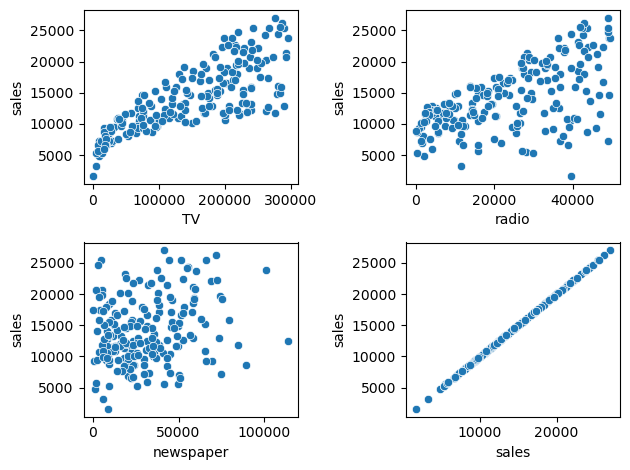

In [7]:
i = 1
for cols in df.columns:
    plt.subplot(2,2,i);i += 1
    sns.scatterplot(x = df[cols],y = df.sales, data = df)
    plt.tight_layout()

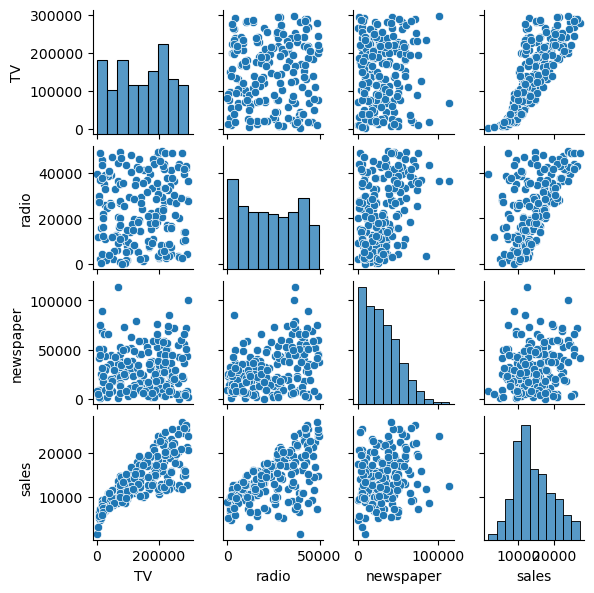

In [8]:
sns.pairplot(df,height=1.5)

<Axes: >

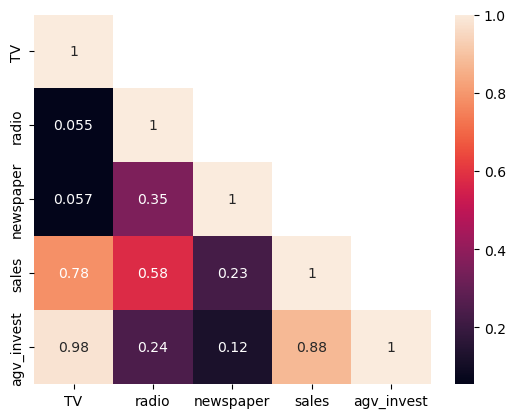

In [63]:
corr_matrix = df.corr()
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))# it gives only different feature values not the same feature
mask = np.triu(np.ones(corr_matrix.shape), k=1)
sns.heatmap(df.corr() , annot=True, mask = mask)

In [64]:
df['agv_invest'] = df.iloc[:,0]+df.iloc[:,1]+df.iloc[:,3]

#  Outlier treatment

In [114]:
# useing Z score 
df['z_score'] = (df.newspaper - df.newspaper.mean())/df.newspaper.std()

outlier = df[(df.z_score <- 3) | (df.z_score > 3)]
outlier

,TV,radio,newspaper,sales,agv_invest,z_score
16,67800,36600,114000,12500,116900,3.831556
101,296400,36300,100900,23800,356500,3.230048


In [162]:
df['z_score'].head(3)

0    1.774493
1    0.667903
2    1.779084
Name: z_score, dtype: float64

In [120]:
# removing outliers

df = df[~((df.z_score <- 3) | (df.z_score > 3))]
df.shape

(198, 6)

In [ ]:
# this is another way to treatment outlier
# uperlimit = np.percentile(df.Newspaper, 95)
# lowerlimit = np.percentile(df.Newspaper, .05)
# uperlimit,lowerlimit
# data = df[(df.Newspaper < uperlimit) & (df.Newspaper > lowerlimit)]

# Simple Linear Regression modeling

In [264]:
X = df.iloc[:,-2:5]
y = df.iloc[:,-3]

In [265]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [266]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

lin_model = reg.fit(x_train,y_train)

lin_model.intercept_, lin_model.coef_

(4972.771712004202, array([0.04888911]))

In [267]:
ypred_train = reg.predict(x_train)
ypred_test = reg.predict(x_test)

In [268]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
print(' TEST ACCURACY-----------------------')
MSE = mean_squared_error(ypred_test, y_test)
RMSE = np.sqrt(MSE)
r2 = r2_score(ypred_test, y_test)

#Print Test Accuracy
print(' RMSE : ', RMSE,'\n','R squared : ', r2,'\n','score : ',lin_model.score(x_test, y_test))

print()
print(' TRAIN ACCURACY-----------------------')
MSE = mean_squared_error(ypred_train, y_train)
RMSE = np.sqrt(MSE)
r2 = r2_score(ypred_train, y_train)

#Print Train Accuracy
print(' RMSE : ', RMSE,'\n','R squared : ', r2,'\n','score : ',lin_model.score(x_train, y_train))

print()
cv_score = cross_val_score(lin_model, X, y, cv = 5)
print('==>Cross Validation : ',cv_score.mean())

 TEST ACCURACY-----------------------
 RMSE :  2515.365617270642 
 R squared :  0.6656730103448103 
 score :  0.7667278375795055

 TRAIN ACCURACY-----------------------
 RMSE :  2527.0901040271024 
 R squared :  0.6869249990024981 
 score :  0.7615711206445415

==>Cross Validation :  0.7519707446927933


<Axes: xlabel='agv_invest', ylabel='sales'>

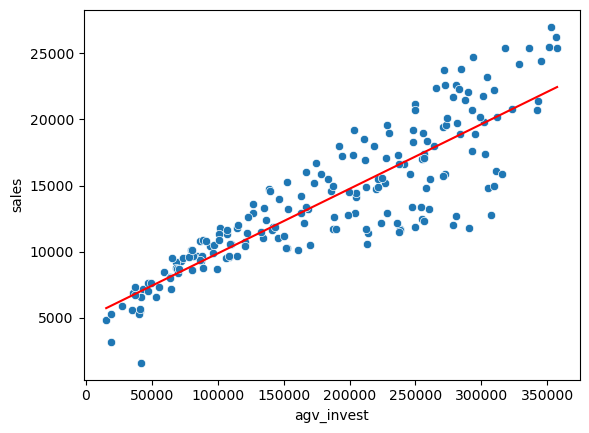

In [269]:
sns.scatterplot(x = X['agv_invest'],y = y)
sns.lineplot(x = X['agv_invest'], y = lin_model.predict(X), color = 'red')

# Multi linear Model

In [270]:
X = df.iloc[:,:3]
y = df.iloc[:,-3]

In [271]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [280]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

multi_model = reg.fit(x_train,y_train)

multi_model.intercept_, multi_model.coef_

(3424.9014298493676,
 array([ 0.00000000e+00,  9.27461867e-02,  4.21984865e-02,  5.87456649e-02,
        -4.31779141e-07,  1.37588843e-06, -4.79929059e-07, -1.02070746e-06,
         3.64419494e-07, -8.66053942e-07,  7.22524541e-13, -1.28906493e-12,
         1.12170879e-12,  2.42008787e-12, -2.52727188e-12,  2.43933222e-12,
         9.87079459e-12,  1.45288329e-12, -3.74185256e-12,  5.54910656e-12]))

In [273]:
ypred_train = multi_model.predict(x_train)
ypred_test = multi_model.predict(x_test)

In [274]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
print(' TEST ACCURACY-----------------------')
MSE = mean_squared_error(ypred_test, y_test)
RMSE = np.sqrt(MSE)
r2 = r2_score(ypred_test, y_test)

#Print Test Accuracy
print(' RMSE : ', RMSE,'\n','R squared : ', r2,'\n','score : ',multi_model.score(x_test, y_test))

print()
print(' TRAIN ACCURACY-----------------------')
MSE = mean_squared_error(ypred_train, y_train)
RMSE = np.sqrt(MSE)
r2 = r2_score(ypred_train, y_train)

#Print Train Accuracy
print(' RMSE : ', RMSE,'\n','R squared : ', r2,'\n','score : ',multi_model.score(x_train, y_train))

print()
cv_score = cross_val_score(multi_model, X, y, cv = 5)

print('==>Cross Validation : ',cv_score.mean())

 TEST ACCURACY-----------------------
 RMSE :  1655.5699642993025 
 R squared :  0.8738031144270474 
 score :  0.8989454779619589

 TRAIN ACCURACY-----------------------
 RMSE :  1688.184441727003 
 R squared :  0.8809262905164621 
 score :  0.8935961872087126

==>Cross Validation :  0.8853605756683912


# Polynomial regression model

In [275]:
X = df.iloc[:,:3]
y = df.iloc[:,-3]

In [276]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [277]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

poly_model = reg.fit(x_train,y_train)

poly_model.intercept_ , poly_model.coef_

(3424.9014298493676, array([0.04888911]))

In [278]:
ypred_train = reg.predict(x_train)
ypred_test = reg.predict(x_test)

In [279]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
print(' TEST ACCURACY-----------------------')
MSE = mean_squared_error(ypred_test, y_test)
RMSE = np.sqrt(MSE)
r2 = r2_score(ypred_test, y_test)

#Print Test Accuracy
print(' RMSE : ', RMSE,'\n','R squared : ', r2,'\n','score : ',poly_model.score(x_test, y_test))
print()
print(' TRAIN ACCURACY-----------------------')
MSE = mean_squared_error(ypred_train, y_train)
RMSE = np.sqrt(MSE)
r2 = r2_score(ypred_train, y_train)

#Print Train Accuracy
print(' RMSE : ', RMSE,'\n','R squared : ', r2, '\n','score : ',poly_model.score(x_train, y_train))

print()
cv_score = cross_val_score(poly_model, x_train, y_train, cv = 5)

print('==>Cross Validation : ',cv_score.mean())

 TEST ACCURACY-----------------------
 RMSE :  531.219723508327 
 R squared :  0.9894811539271309 
 score :  0.9895957912390448

 TRAIN ACCURACY-----------------------
 RMSE :  466.8496829115727 
 R squared :  0.9917961521177486 
 score :  0.9918628646539335

==>Cross Validation :  0.9838152833486336
